# **Róbert Šafár** & **Matúš Totcimak**
## 2. fáza: *Predspracovanie údajov*
#### Dataset 82
#### Podiel práce 0:0
#
#

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import re
from sklearn.model_selection import train_test_split

## Načítanie CSV súborov

In [2]:
con = pd.read_csv("dataset82/connections.csv", sep='\t')
proc = pd.read_csv("dataset82/processes.csv", sep='\t')
dev = pd.read_csv("dataset82/devices.csv", sep='\t')
prof = pd.read_csv("dataset82/profiles.csv", sep='\t')

#
# **2.1 Realizácia predspracovania dát**

### Ná základe prvej fázy nebudeme pracovať s `Devices` a `Profiles`.
### Nedokážeme jednoznačne priradiť záznam z `Connections` a `Processes` ku záznamu v `Devices` a `Profiles`, pretože viacero `imei` je súčasťou viacerých záznamov vo všetkých DF a je jediným spojením medzi `Connections`/`Processes` a `Devices`/`Profiles` v priemere 5 rôznych záznamov v `Devices` a `Profiles` a , a teda nevieme presne určíť ktoré záznamy k sebe patria.
### Tento fakt sme zistili už v prvej fáze analýzy `EDA`.

In [3]:
pd.set_option('display.max_columns', None)

#
## *A) Rozdelenie dát na trénovaciu a testovaciu množinu.*

### Pred spojením `Connections` a `Processes` odstránime duplikátne záznamy.

In [4]:
con = con.loc[~con.duplicated()].reset_index(drop=True).copy()
proc = proc.loc[~proc.duplicated()].reset_index(drop=True).copy()

### Spojenie `Connections` a `Processes`. Rovnako ako vo Fáze 1.

In [5]:
df = pd.merge(con, proc, on=['ts', 'imei', 'mwra'])

### Nový DF rozdelíme na `X` a `y`.

In [6]:
X = df.drop(columns=['mwra'])
y = df[['mwra']]

### Pomer rozdelenia zvolíme `80:20`.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)

#
## *B) Transformujte dáta na vhodný formát pre ML.*

### Overenie chýbajúcich hodnôt. Z `EDA` už vieme, že žiadne nie sú.

In [8]:
X_train.isna().sum()[X_train.isna().sum() > 0]

Series([], dtype: int64)

### Drop `ts` a `imei`.

In [9]:
X_train = X_train.drop(columns=['ts', 'imei'])

In [10]:
X_train.head()

,c.dogalize,c.android.chrome,c.katana,c.android.gm,c.android.youtube,c.android.vending,c.updateassist,c.UCMobile.x86,c.UCMobile.intl,c.raider,p.android.packageinstaller,p.android.externalstorage,p.system,p.android.chrome,p.android.settings,p.android.documentsui,p.android.gm,p.katana,p.google,p.android.gms,p.inputmethod.latin,p.process.gapps,p.olauncher,p.browser.provider,p.notifier,p.gms.persistent,p.android.defcontainer,p.android.vending,p.simulator,p.dogalize
565,8.60953,12.73055,12.01878,8.45457,11.10698,73.45484,0.00595,0.50448,65.05409,71.45858,12.43807,10.07901,14.20938,12.73571,9.84099,7.45930,14.49859,44.75330,51.91426,52.35816,49.64411,48.56082,31.24975,26.17759,70.34155,61.75597,92.96143,97.92628,85.16685,3.27504
1508,10.27806,11.28730,9.42976,10.20550,11.98281,50.32561,0.03056,19.87591,99.08666,19.99482,14.07713,11.00547,13.56190,8.98385,7.44342,11.94440,12.94143,51.31636,53.23352,40.40883,47.41102,47.90279,26.70759,83.32119,90.85157,40.17520,50.45382,75.74076,10.59916,72.54897
977,8.24581,11.77798,6.91640,11.93203,11.66508,50.84249,0.49417,97.91811,61.27970,24.90260,16.86176,7.93090,8.69713,14.32762,13.38075,6.76806,10.18860,51.92549,49.71935,33.59285,75.14122,8.37005,40.17551,19.85244,14.68255,60.96021,1.45024,27.32364,45.90377,67.10022
11173,13.24080,11.44082,12.41949,7.47649,8.08696,51.91517,0.00037,98.35590,37.24727,25.72595,9.57502,12.39022,7.31436,13.66490,9.26975,8.58314,11.64071,47.12311,46.06654,63.90380,41.12739,87.84939,51.78575,73.35872,80.33285,47.73591,0.54364,0.74081,32.02525,19.34333
1985,9.45744,16.55064,13.39536,6.56400,9.72739,60.49845,0.00013,50.53411,32.33004,58.16625,8.31293,7.05830,10.77314,11.77352,9.45362,8.78102,12.22709,49.10162,39.82391,29.77845,63.78748,18.24866,93.90721,62.07299,74.52330,30.54933,50.20014,74.71454,33.13641,30.10253


In [19]:
X_train.describe()

,c.dogalize,c.android.chrome,c.katana,c.android.gm,c.android.youtube,c.android.vending,c.updateassist,c.UCMobile.x86,c.UCMobile.intl,c.raider,p.android.packageinstaller,p.android.externalstorage,p.system,p.android.chrome,p.android.settings,p.android.documentsui,p.android.gm,p.katana,p.google,p.android.gms,p.inputmethod.latin,p.process.gapps,p.olauncher,p.browser.provider,p.notifier,p.gms.persistent,p.android.defcontainer,p.android.vending,p.simulator,p.dogalize
count,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000,11968.000000
mean,10.011613,12.367706,11.190440,10.608578,10.572459,55.602517,0.040348,49.672826,50.170068,49.783137,11.120284,9.386557,9.954221,11.754597,9.939938,10.016887,11.211343,48.095539,48.457110,41.094268,49.820342,50.407967,49.586141,49.798784,49.756170,50.289638,49.900230,49.900549,49.650293,49.900048
std,2.557418,2.032816,2.422594,2.632021,2.660816,11.589520,0.208287,29.030843,28.822977,28.711298,2.710886,2.271806,2.612002,2.281242,2.483387,2.621425,2.639040,11.304725,13.090893,11.559497,13.023287,28.868406,28.996670,28.940150,28.929999,28.851126,28.997884,28.937923,29.085704,28.867102
min,2.696361,6.873201,4.172781,2.929031,2.824374,24.073809,0.000000,0.000120,0.000000,0.000000,3.114677,3.466382,2.536627,5.778779,2.607310,2.371937,3.647466,17.538819,13.195138,9.792709,14.633826,0.000000,0.003790,0.000000,0.000000,0.000000,0.000000,0.000000,0.007680,0.004030
25%,8.155735,10.982627,9.415980,8.675920,8.605957,47.676648,0.000240,24.676990,25.193368,25.321225,9.104960,7.848478,8.070977,10.327072,8.140445,8.106100,9.315625,40.492663,39.631642,33.260445,41.046998,25.323630,24.650227,24.722722,24.600517,25.578385,24.683673,24.534393,24.271138,25.026085
50%,9.860985,12.365935,11.406420,10.705905,10.506125,55.731405,0.001440,49.408875,49.709495,49.842550,11.003820,9.170580,9.766935,11.966050,9.869595,9.983125,11.328745,48.138815,48.428540,41.174060,49.937235,50.894855,49.154720,49.749995,49.928925,50.560345,49.859375,49.743860,50.068305,49.559150
75%,11.791963,13.718875,12.909472,12.507478,12.464623,63.423650,0.011430,75.042407,75.233065,74.185677,13.092820,10.763940,11.762483,13.355313,11.827840,11.925265,13.097953,55.783915,57.267655,48.904922,58.649187,75.390550,74.850070,74.997350,74.441968,75.348973,75.381622,75.015002,74.911470,75.109573
max,17.247031,17.822971,18.149211,18.253641,18.251464,87.040059,4.453530,100.000000,100.000000,99.992610,19.060400,15.154903,17.300508,17.901869,17.362690,17.656198,18.768496,78.726589,83.696578,72.385399,85.072216,99.987800,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#
### *`Funkcia:`* Vykreslenie Box-plotov pre každý atribút z `df`.

In [11]:
def show_boxplots(df):
    _, ax = plt.subplots(figsize=(17, 7))
    df.boxplot(ax=ax,
                    boxprops=dict(color='#34495E'),
                    flierprops=dict(markeredgecolor='#9B59B6', markersize=5),
                    medianprops=dict(color='#3498DB', linewidth=1.5),
                    capprops=dict(color='black'),
                    whiskerprops=dict(color='black')
                    )
    ax.grid(True, linewidth=0.3)
    plt.xticks(rotation=270)
    plt.title("Boxploty atribútov X_train")
    plt.ylabel("Hodnoty")
    plt.show()

### Zobrazenie atribútov a ich outlierov pomocou `Box-plotov`.

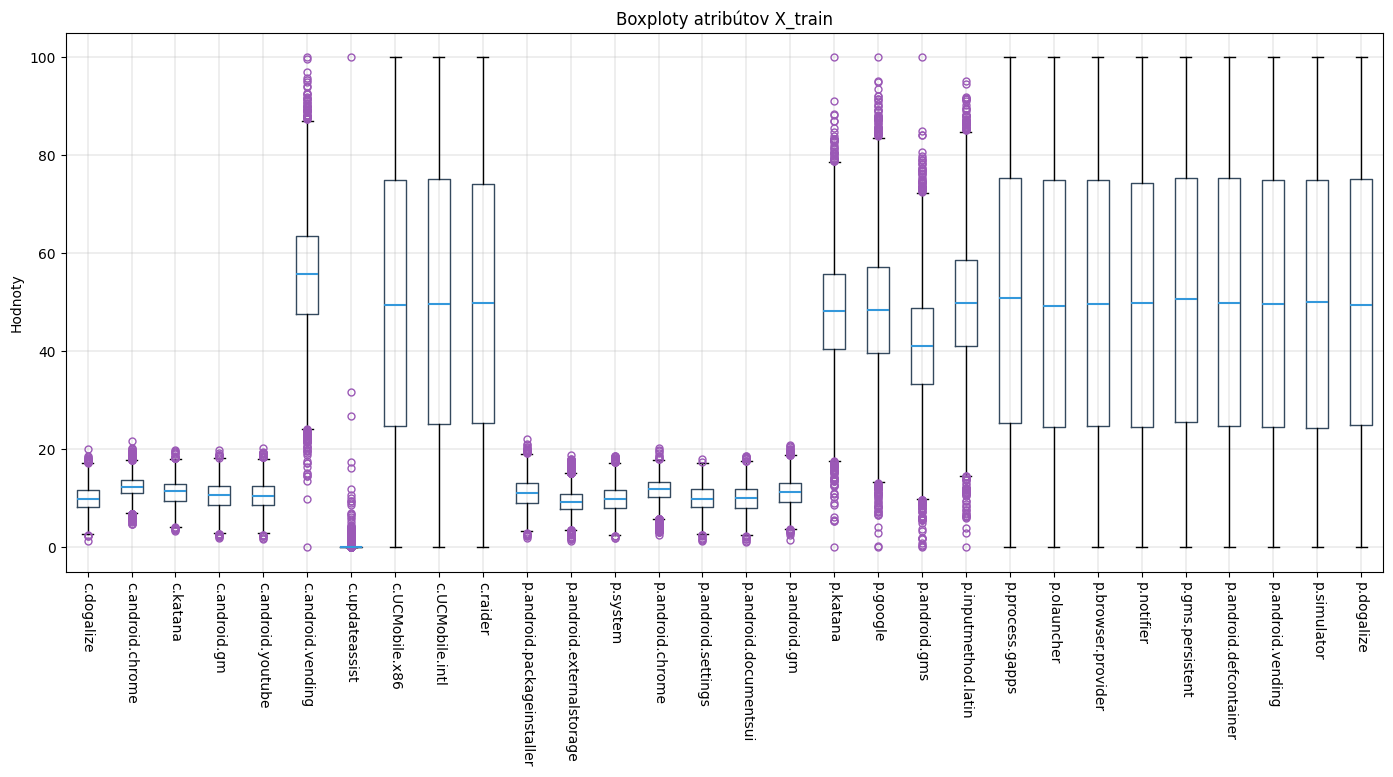

In [12]:
show_boxplots(X_train)

### *`Funckia:`* Zmena outlierov na hraničné hodnoty.

In [13]:
def change_outliers_iqr(df, exceptions):
    for column in df:
        if column in exceptions:
            continue
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

### Zmena outlierov pre všetky atribúty `df` okrem `df['c.updateassist']`.

In [14]:
X_train = change_outliers_iqr(X_train, ['c.updateassist'])

### Odstránenie záznamov, kde `df['c.updateassist'] >= 5`. Na základe EDA!!!

In [15]:
X_train = X_train[X_train['c.updateassist'] < 5]

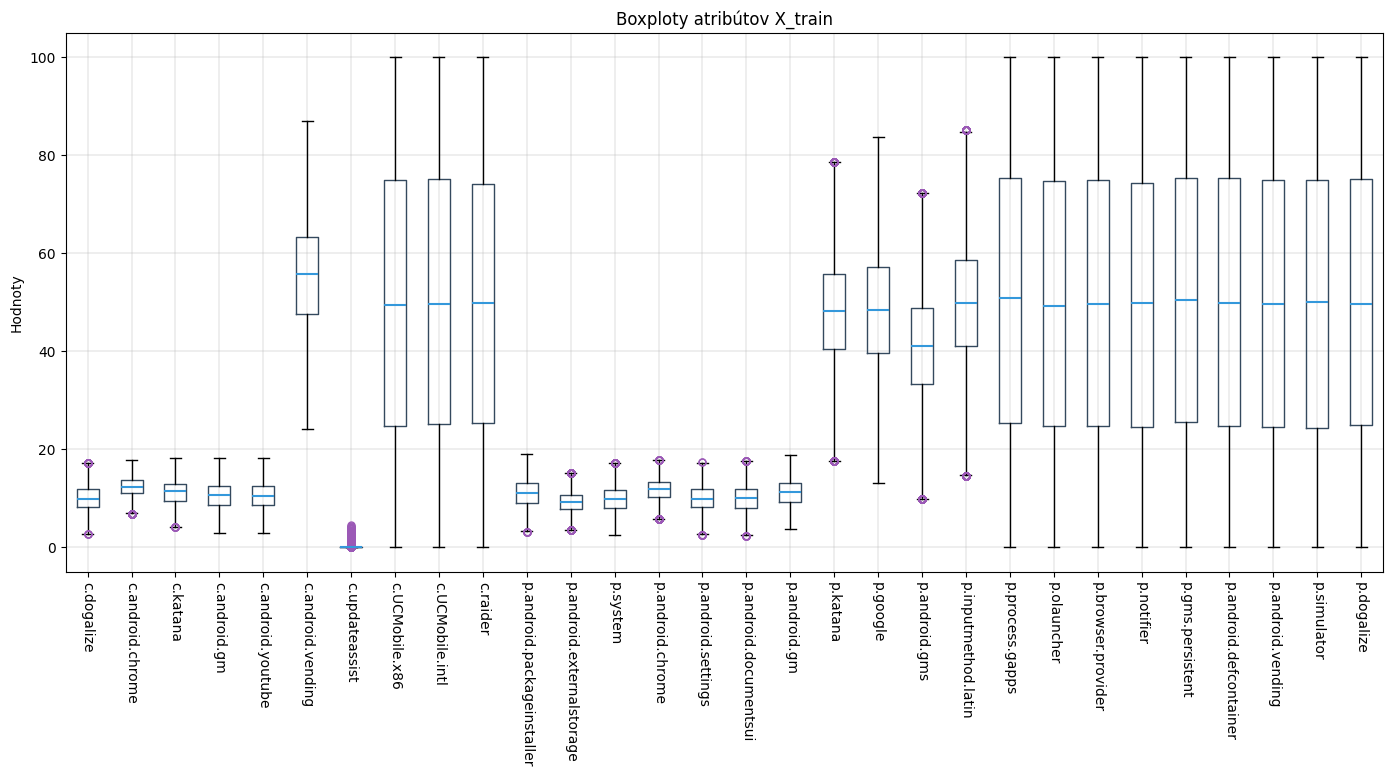

In [17]:
show_boxplots(X_train)

### Niektoré outliery zostali, pretože sa nachádzajú blízko dolnej/hornej hranice. Môžeme ich však považovať za zanedbateľné. Rovnako sme postupovali s outliermi v `EDA`.

## Mozno ukazky na OrdinalEncoder / SimpleImputer.
#

### OneHotEncoder(vsetky kategorie ako stlpce -> 0/1) | OrdinalEncoder(uviest, konkretne moznosti daneho stlpca -> S M L)

### Treba imei?

### Upravit TS

### Upravit IMEI -> OrdinalEncoder

### Upravit MWRA na int

#
## *C) Transformujte atribúty dát pre strojové učenie.*

### Scaling: StandardScaler(mean=0, sd=1) | MinMaxScaler(range(0,1))

### Transform: Logaritmická transformácia | 

## *D) Zdôvodnite Vaše voľby/rozhodnutie pre realizáciu.*

#
# **2.2 Výber atribútov pre strojové učenie**

## *A) Zistite, ktoré atribúty sú informatívne k predikovanej premennej.*

## *B) Zoraďte zistené atribúty v poradí podľa dôležitosti.*

## *C) Zdôvodnite Vaše voľby/rozhodnutie pre realizáciu.*

#
# **2.3 Výber atribútov pre strojové učenie**

## *A) Upravte váš kód realizujúci predspracovanie trénovacej množiny na použitie predspracovania testovacej množiny v kontexte strojového učenia.*

## *B) Využite možnosti sklearn.pipeline.*